# MNIST_FASHION 数据集DEMO

In [5]:
# 导入数据集
import tensorflow as tf

mnist_fashion = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist_fashion.load_data()
# 归一化
train_images = train_images / 255.0
test_images = test_images / 255.0

# 构建模型
model = tf.keras.models.Sequential([
    # 输入层
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # 第二个卷积层
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # 展平层
    tf.keras.layers.Flatten(),
    
    # 全连接层
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 输出层
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
print(model.summary())

Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4090 - accuracy: 0.8511 - val_loss: 0.3293 - val_accuracy: 0.8811
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2732 - accuracy: 0.8989 - val_loss: 0.2683 - val_accuracy: 0.9034
Epoch 3/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2238 - accuracy: 0.9155 - val_loss: 0.2575 - val_accuracy: 0.9040
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1911 - accuracy: 0.9285 - val_loss: 0.2616 - val_accuracy: 0.9131
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1608 - accuracy: 0.9390 - val_loss: 0.2620 - val_accuracy: 0.9074
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       1280      
                                                       

313/313 [==============================] - 2s 8ms/step
test_images[0]: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.    

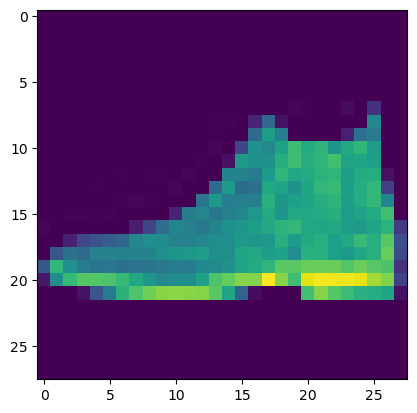

In [10]:
import matplotlib.pyplot as plt

predict = model.predict(test_images)
print(f'test_images[0]: {test_images[0]}')
print(f'test_labels[0]: {test_labels[0]}')
print(f'predict[0]max :{tf.argmax(predict[0])} ')
plt.imshow(test_images[0])
